K-means Cluster Analysis

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from sklearn.cluster import KMeans

In [3]:
os.chdir(r"/Users/SteveAhn/Downloads/1.DataAnalyst/Python/PythonData")

In [4]:
raw_data = pd.read_csv("CountryClusters.csv")

In [5]:
raw_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


Select Features based on Location

In [8]:
x = raw_data.iloc[:,1:3]

In [9]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [25]:
kmeans = KMeans(3m)

In [26]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Clustering Results

In [27]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [30]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


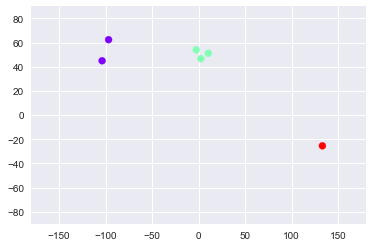

In [31]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c= data_with_clusters['Cluster'], cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

WCSS

In [33]:
kmeans.inertia_

288.1052333333333

In [34]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [35]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

The Elbow Method

Text(0,0.5,'Within-Clusters sum of squares')

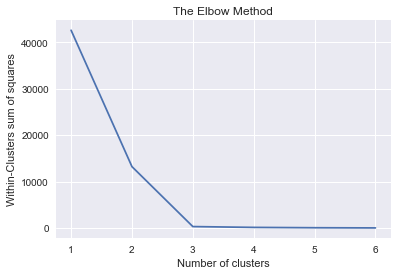

In [36]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Clusters sum of squares')

3 Clusters is the optimal number of clusters